This notebook will be used to look at plots from the nowcast_green runs

In [12]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import glob

from salishsea_tools import viz_tools

#from nowcast import analyze

%matplotlib inline

Loading nowcast_green results

In [2]:
dmy = '08feb16'
dateStr = 'Feb 8, 2016'
filename = glob.glob('/results/SalishSea/nowcast-green/%s/SalishSea_1h_*_ptrc_T.nc' % dmy)
grid_g = nc.Dataset(filename[0])
thalweg = np.loadtxt('/data/dlatorne/MEOPAR/tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)
bio = nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_full_01/mesh_mask.nc')
e3t = bio.variables['e3t_0']

Pre-load and set some variable

In [3]:
zlevels = grid_g.variables['deptht'][:]
x, z = np.meshgrid(np.arange(thalweg.shape[1]), zlevels)
time = -1

## Make Depth integrated plots for creatures...

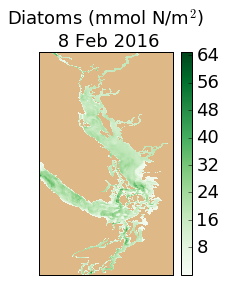

In [4]:
fig, axs = plt.subplots(1,1,figsize=(3,4))
    
conc = grid_g.variables['PHY2']
conc_ma = np.ma.masked_values(conc[time, :, :, :], 0)
    
dep_int = conc_ma*e3t[0,:,:,:]
dep_int_sum = np.sum(dep_int, axis=0)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(dep_int_sum, cmap=cmap)
cbar = fig.colorbar(mesh)
cbar.ax.tick_params(labelsize=18)
axs.set_title('Diatoms (mmol N/m$^2$)\n 8 Feb 2016'.format(label=conc.long_name.title()), fontsize=18)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('DIA.png',dpi=200)

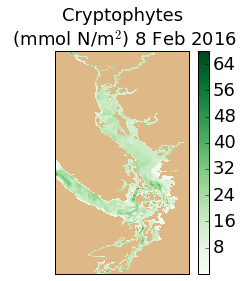

In [5]:
fig, axs = plt.subplots(1,1,figsize=(3,4))
    
conc = grid_g.variables['PHY']
conc_ma = np.ma.masked_values(conc[time, :, :, :], 0)
    
dep_int = conc_ma*e3t[0,:,:,:]
dep_int_sum1 = np.sum(dep_int, axis=0)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(dep_int_sum1, cmap=cmap)
cbar = fig.colorbar(mesh)
cbar.ax.tick_params(labelsize=18)
axs.set_title('Cryptophytes\n (mmol N/m$^2$) 8 Feb 2016'.format(label=conc.long_name.title()), fontsize=18)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('CRY.png',dpi=200)

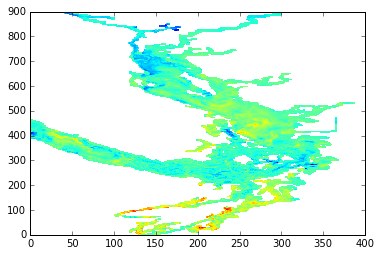

In [6]:
mesh=plt.pcolormesh(dep_int_sum-dep_int_sum1)

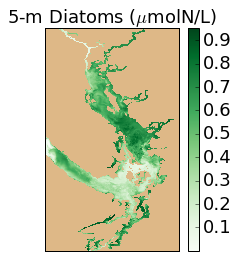

In [7]:
fig, axs = plt.subplots(1,1,figsize=(3,4))

#Prepare surface values
conc=grid_g.variables['PHY2']
conc_ma = np.ma.masked_values(conc[12,5, :, :], 0)
vmin = np.min(conc_ma)
vmax = np.max(conc_ma)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(conc_ma, cmap=cmap,vmin=vmin,vmax=vmax)
cbar = fig.colorbar(mesh)
cbar.ax.tick_params(labelsize=18)
axs.set_title('5-m Diatoms ($\mu$molN/L)'.format(label=conc.long_name.title()), fontsize=18)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('/home/eolson/pyCode/notebooks/figs/diat5.png',dpi=200)

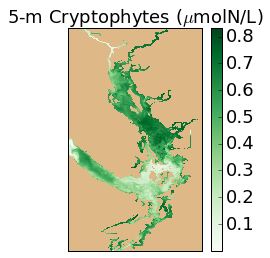

In [8]:
fig, axs = plt.subplots(1,1,figsize=(3,4))

#Prepare surface values
conc=grid_g.variables['PHY']
conc_ma = np.ma.masked_values(conc[12,5, :, :], 0)
vmin = np.min(conc_ma)
vmax = np.max(conc_ma)

cmap = plt.get_cmap('Greens')
cmap.set_bad('burlywood')
    
#Surface plot
mesh = axs.pcolormesh(conc_ma, cmap=cmap,vmin=vmin,vmax=vmax)
cbar = fig.colorbar(mesh)
cbar.ax.tick_params(labelsize=18)
axs.set_title('5-m Cryptophytes ($\mu$molN/L)'.format(label=conc.long_name.title()), fontsize=18)
#cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)
fig.savefig('/home/eolson/pyCode/notebooks/figs/cryp5.png',dpi=200)

In [9]:
np.max(dep_int_sum-dep_int_sum1)

5.3007255303883269

In [10]:
print(e3t[0,:,80,80])

[  1.00000115   1.00000501   1.00001253   1.00002718   1.0000557
   1.00011125   1.00021946   1.0004302    1.00084067   1.00164012
   1.0031971    1.00622914   1.01213271   1.02362358   1.04597551
   1.08940061   1.17356428   1.33592899   1.64636781   2.22990285
   3.29248567   5.11998508   7.97451506  11.8252972   16.10792044
  19.95870258  22.81323256  24.64073198  25.70331479  26.28684983
  26.59728865  26.75965336  26.84381704  26.88724213  26.90959407
  26.92108493  26.9269885   26.93002054  26.93157752  26.93237697]


In [11]:
print(conc[0,:,400,278])

[ 1.14684439  0.73685545  0.80070424  0.67241162  0.70061564  0.72256589
  0.71242893  0.69922447  0.67732865  0.64308792  0.60712171  0.55876428
  0.50934005  0.45941678  0.41222036  0.36877912  0.32522786  0.28617924
  0.25064737  0.21318881  0.18253106  0.15335251  0.10803059  0.05207067
  0.03742198  0.03191361  0.02673046  0.01700656  0.01132831  0.00777103
  0.0056087   0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
